In [2]:
from os.path import normpath
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np

In [3]:
# Read the data set
data = pd.read_csv('titanic_modified_dataset.csv')
data.head()
# Definitions of some columns
# – PassengerId: Mã hàng khách. Đây được xem là chỉ mục của bảng dữ liệu. – Pclass: Hạng vé tàu của hàng khách.
# – Sex: Giới tính của hàng khách.
# – Age: Tuổi của hàng khách.
# – SibSp: Số lượng anh chị em và/hoặc người yêu đi cùng chuyến tàu với hàng khách. – Parch: Số lượng phụ huynh và/hoặc con cháu đi cùng chuyến tàu với hàng khách. – Fare: Giá vé tàu của hàng khách.
# – Embarked: Cảng xuất phát của hàng khách.
# – Title: Tước hiệu của hàng khách.
# – Survived: Hàng khách có (1) sống sót qua thảm kịch hay không (0)?

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
0,1,3,0,22.0,1,0,7.2500,0,0,0
1,2,1,1,38.0,1,0,71.2833,1,1,1
2,3,3,1,26.0,0,0,7.9250,0,2,1
3,4,1,1,35.0,1,0,53.1000,0,1,1
4,5,3,0,35.0,0,0,8.0500,0,0,0


In [4]:
def sigmoid_function(Z):
    return 1 / (1 + np.exp(-Z))

def compute_loss(y, y_hat):
    y_hat = np.clip(y_hat, 1e-8,1 - 1e-8)
    return  (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def predict(X, theta):    
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

def compute_gradient(X, y, y_hat):
    return np.dot(X.T,(y_hat - y)) / y.size

In [5]:
#define training, val and test sample
training_size = .7
val_size = .2
test_size = .10

train_samples = int(training_size * data.shape[0])
val_samples = train_samples + int(val_size * data.shape[0])


In [6]:
# create matrix X

X = data.iloc[:,1:-1]
m = X.shape[0]

maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)
X = (X-avg) / (maxi-mini)

intercept = np.ones((X.shape[0],1))
X_b = np.concatenate((intercept, X), axis=1)

# create a Vector Y
Y = np.array(data.iloc[:,-1])

#create X train Y train
X_train, Y_train = X_b[:train_samples],Y[:train_samples]

#create X val, Y val
X_val, Y_val = X_b[train_samples:val_samples],Y[train_samples:val_samples]

#create X test, Y test:
X_test, Y_test = X_b[val_samples:],Y[val_samples:]

print(type(data))
print(type(X_b))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/Users/dbui/Documents/Macbook pro 2022/AIO/logistic_updated/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/dbui/Documents/Macbook pro 2022/AIO/logistic_updated/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/dbui/Documents/Macbook pro 2022/AIO/logistic_updated/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'f

In [7]:
# split data into train, validation and test


In [25]:
# for _ in epoc
# print(X_b_shuffled.shape)
# Z = X_b_shuffled.dot(theta)
# print(Z)

def training_model(X_train, Y_train):
    theta = np.random.normal(0.0, 0.1, (9,1))
    Losses = []
    accs   = []
    for i in range(n_iters):
        shuffled_indices = np.random.permutation(X_train.shape[0])
        X_b_shuffled     = X_train[shuffled_indices]
        Y_shuffled       = np.array(Y_train[shuffled_indices]).reshape(Y_train.shape[0],1)

        for i in range(0, X_train.shape[0], batch_size):
            Xi = X_b_shuffled[i:i+batch_size]
            Yi = Y_shuffled[i:i+batch_size]
            #predict
            z = np.dot(Xi, theta)
            y_batch_hat = sigmoid_function(z)
            #compute Loss
            loss = compute_loss(Yi, y_batch_hat)

            # append Losses
            Losses.append(loss)

            # compute gradient
            gradient = compute_gradient(Xi, Yi, y_batch_hat)

            # update theta
            theta -=  learning_rate * gradient

            # compute accuracy 
            preds = predict(Xi, theta).round()
            acc = (preds == Yi).mean()
            accs.append(acc)
    
    # return Losses

    # plt.plot(Losses)

    fig, ax = plt.subplots(1,2, figsize = (12,5))
    ax[0].plot(Losses)
    ax[0].set(xlabel='Epoch', ylabel='Loss')
    ax[0].set_title('Training Loss')

    ax[1].plot(accs)
    ax[1].set(xlabel='Epoch', ylabel='Accuracy')
    ax[1].set_title('Training Accuracy')
    
    plt.show()


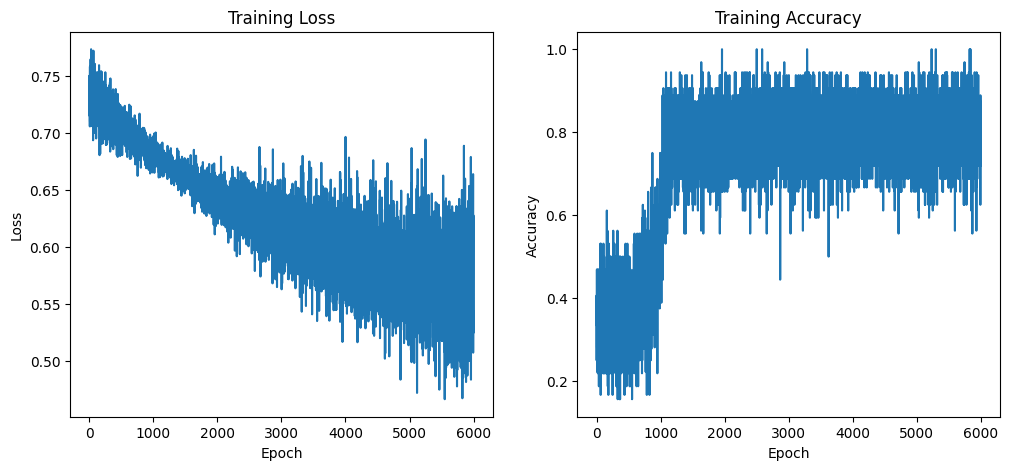

In [26]:
# Mini batch
n_iters = 1000
batch_size = 32
learning_rate = 0.001

# val data set
training_model(X_val,Y_val)

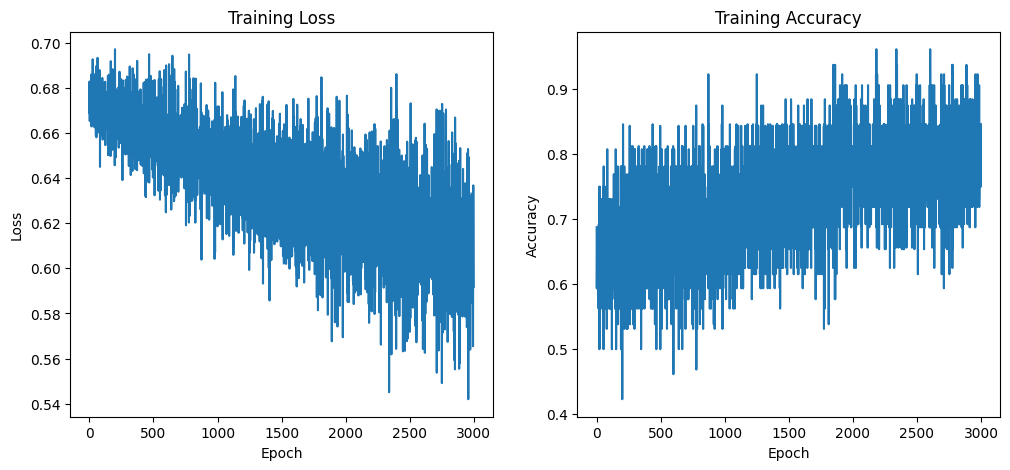

In [27]:
training_model(X_test,Y_test)